## Importing Important Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

## Reading csv file


In [2]:
#Reading csv

dataframe=pd.read_csv("MaterialStrength_Train.csv")

In [3]:
#shape of the dataframe
dataframe.shape

(800, 9)

In [4]:
#random 5 rows of the dataframe
dataframe.sample(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
541,333.0,0.0,0.0,192.0,0.0,931.2,842.6,3,15.62
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14,42.22
342,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,56,51.96
780,238.0,0.0,0.0,185.0,0.0,1118.0,789.0,28,17.54
753,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,28,67.31


In [5]:
#basic information about the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB


In [6]:
#Statistical information like mean, Standardard deviation, minimum and maximum values of a column
dataframe.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,292.533625,67.819125,47.81125,179.77925,5.693500,985.551875,778.426250,49.69625,36.654187
std,103.719988,86.017377,61.53907,22.18845,6.264438,72.783248,82.670454,69.13960,17.623053
min,102.000000,0.000000,0.00000,121.80000,0.000000,801.000000,594.000000,1.00000,2.330000
25%,212.100000,0.000000,0.00000,162.00000,0.000000,938.000000,746.600000,7.00000,23.242500
50%,277.050000,19.000000,0.00000,184.00000,5.250000,974.000000,780.650000,28.00000,35.340000
75%,374.000000,129.800000,117.50000,192.00000,10.200000,1046.925000,839.525000,56.00000,48.880000
max,540.000000,359.400000,174.70000,228.00000,32.200000,1145.000000,992.600000,365.00000,82.600000


#  Data Cleaning, EDA and Feature Engineering


## Removing Duplicates

In [7]:
#checking duplicates
dataframe.duplicated().sum()

24

In [8]:
duplicates = dataframe.duplicated()
duplicate_rows = dataframe[duplicates]
print(duplicate_rows)

     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0   

In [9]:
#remove duplicates
df_no_duplicates = dataframe.drop_duplicates(keep='first')
df_no_duplicates.reset_index(drop=True, inplace=True)
print(df_no_duplicates)

     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0     540.0                 0.0      0.0  162.0               2.5   
1     540.0                 0.0      0.0  162.0               2.5   
2     332.5               142.5      0.0  228.0               0.0   
3     332.5               142.5      0.0  228.0               0.0   
4     198.6               132.4      0.0  192.0               0.0   
..      ...                 ...      ...    ...               ...   
771   525.0                 0.0      0.0  189.0               0.0   
772   500.0                 0.0      0.0  200.0               0.0   
773   500.0                 0.0      0.0  200.0               0.0   
774   500.0                 0.0      0.0  200.0               0.0   
775   540.0                 0.0      0.0  173.0               0.0   

     coarse_aggregate  fine_aggregate   age  Material Strength  
0              1040.0            676.0   28              79.99  
1              1055.0            676.0   

## Visualization


In [10]:
from matplotlib import pyplot as plt

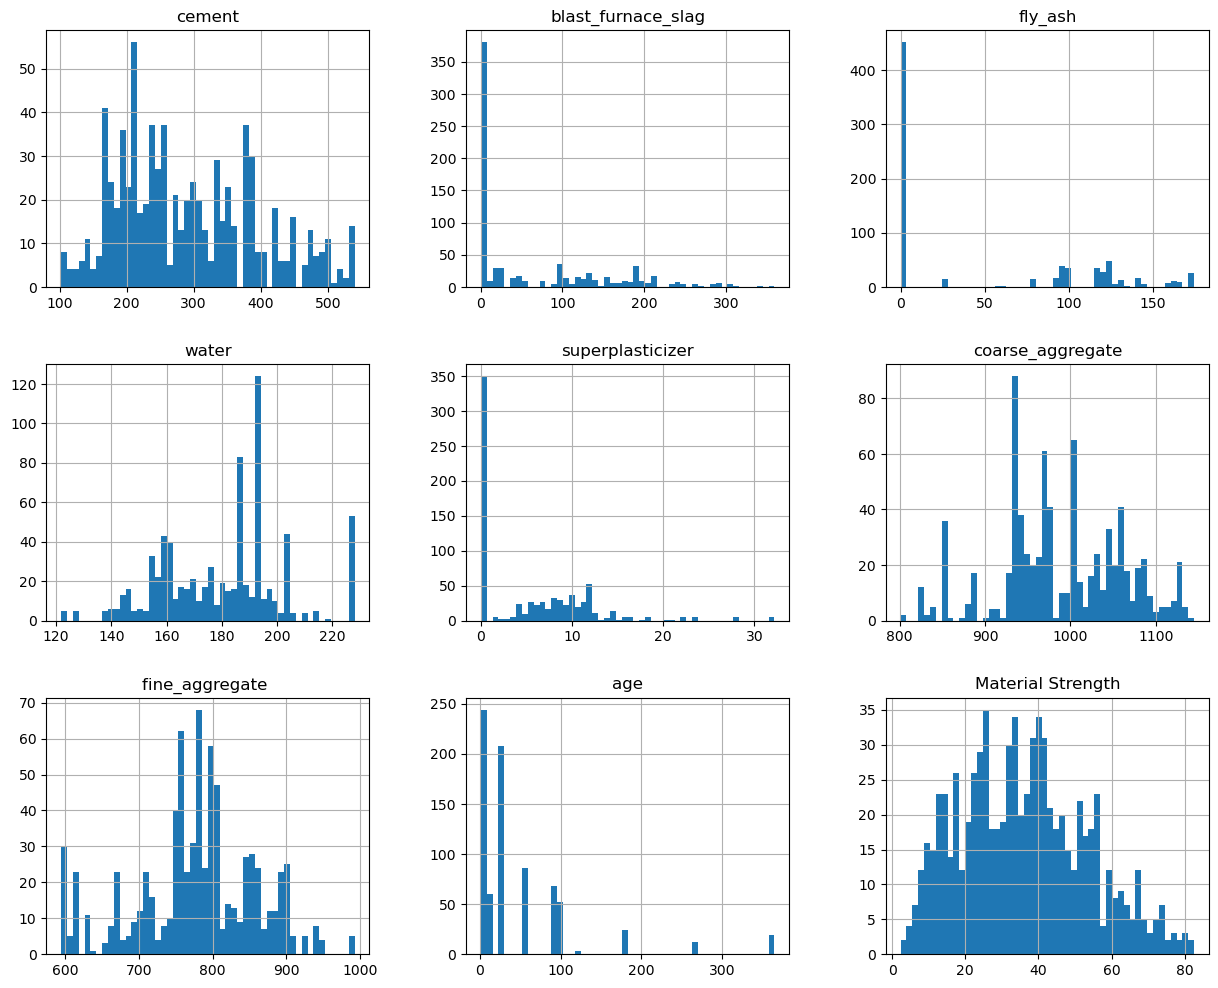

In [11]:
#plot histogram
df_no_duplicates.hist(bins=50, figsize=(15,12))
plt.show()

## Correlations between the attributes

In [12]:
df_no_duplicates.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
cement,1.000000,-0.239788,-0.330568,-0.025719,0.208781,-0.253011,-0.316229,0.055816,0.460156
blast_furnace_slag,-0.239788,1.000000,-0.401126,0.140495,-0.046215,-0.249512,-0.301671,-0.012374,0.088163
fly_ash,-0.330568,-0.401126,1.000000,-0.433831,0.373638,0.168026,0.194679,-0.148979,0.017349
water,-0.025719,0.140495,-0.433831,1.000000,-0.763071,-0.142042,-0.459311,0.331801,-0.278982
superplasticizer,0.208781,-0.046215,0.373638,-0.763071,1.000000,-0.181905,0.277159,-0.174390,0.447484
coarse_aggregate,-0.253011,-0.249512,0.168026,-0.142042,-0.181905,1.000000,-0.188382,-0.073687,-0.186456
fine_aggregate,-0.316229,-0.301671,0.194679,-0.459311,0.277159,-0.188382,1.000000,-0.197913,-0.208380
age,0.055816,-0.012374,-0.148979,0.331801,-0.174390,-0.073687,-0.197913,1.000000,0.352323
Material Strength,0.460156,0.088163,0.017349,-0.278982,0.447484,-0.186456,-0.208380,0.352323,1.000000


<Axes: >

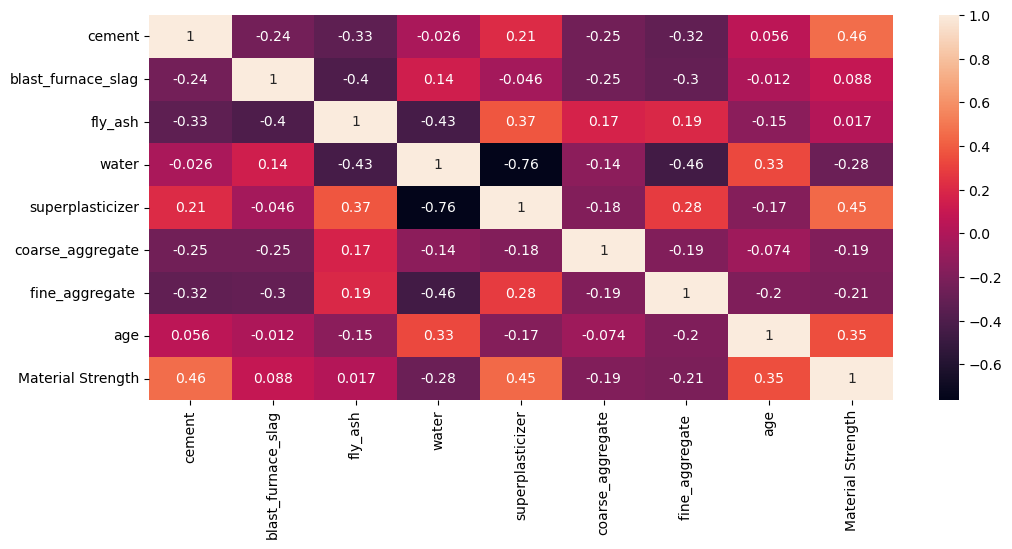

In [13]:
import seaborn as sns
heat_map=plt.subplots(ncols=1,figsize=(12,5))
sns.heatmap(df_no_duplicates.corr(), annot=True)

## Pairplots


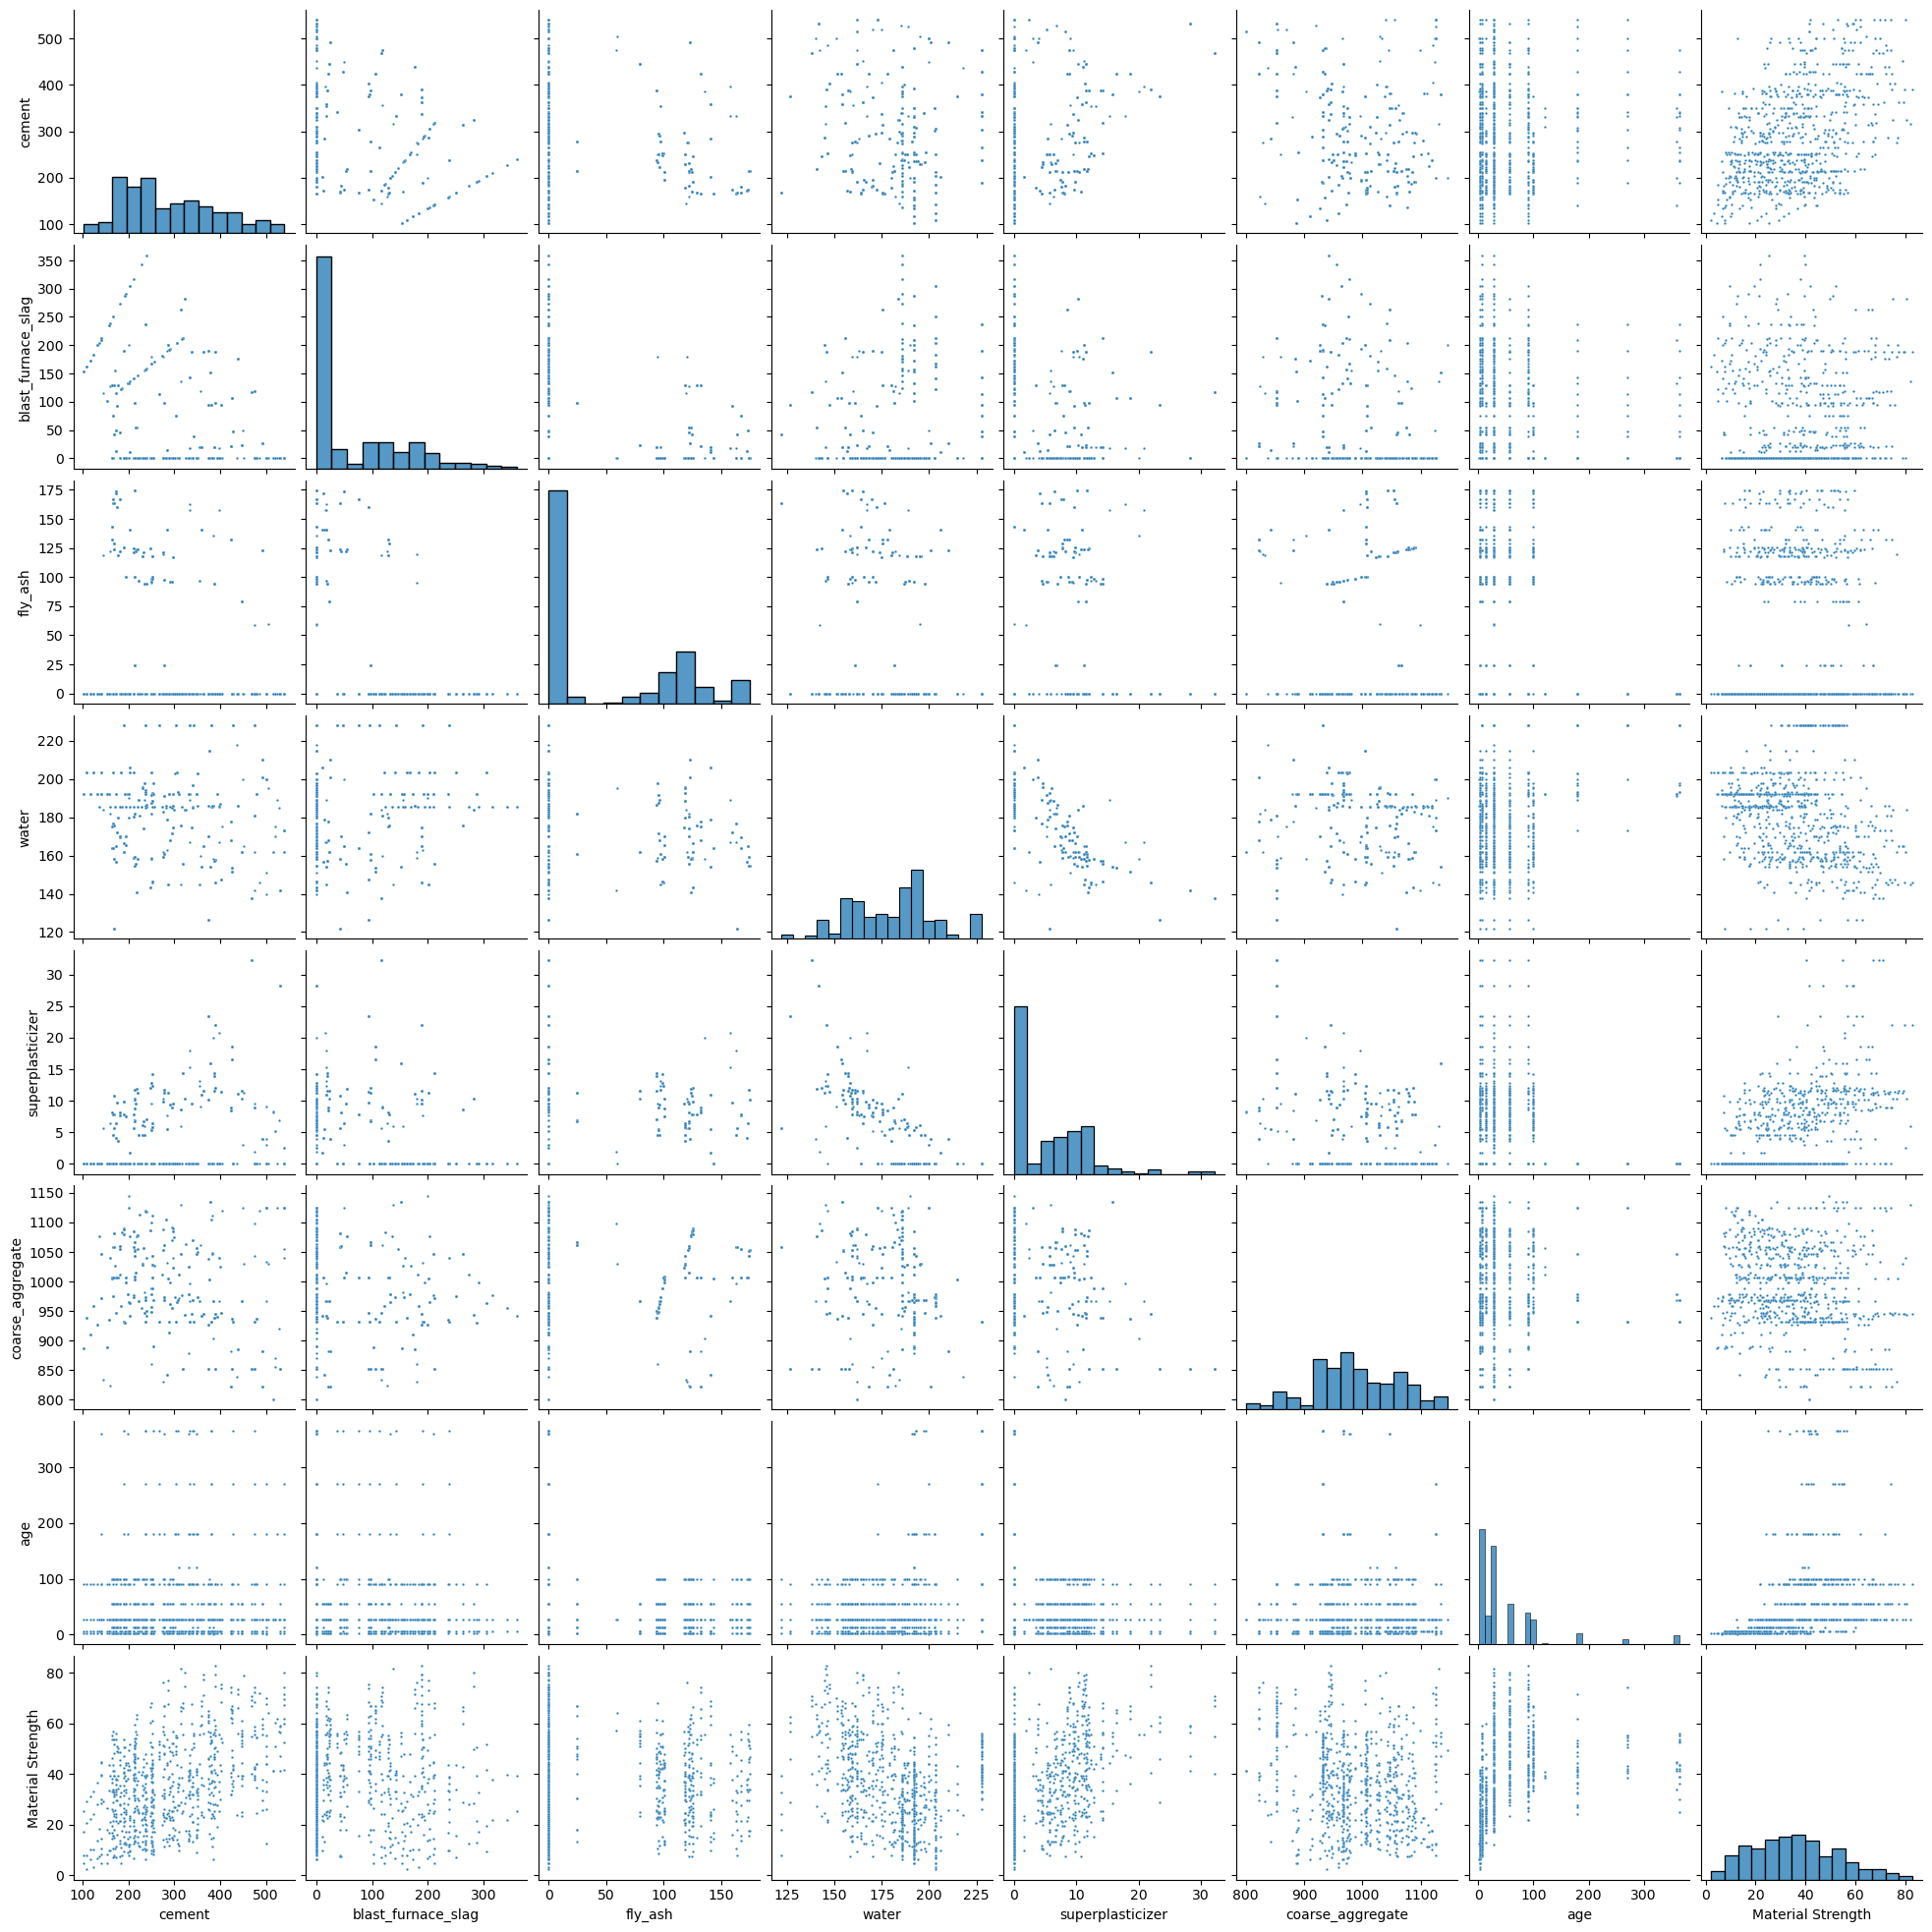

In [14]:
import seaborn as sns
attributes = ["cement", "blast_furnace_slag", "fly_ash", "water","superplasticizer","coarse_aggregate", "age","Material Strength"]

sns.pairplot(df_no_duplicates[attributes], plot_kws={"s": 3})
plt.show()

## Handling Outliers

### Boxplot to find outliers

<Axes: >

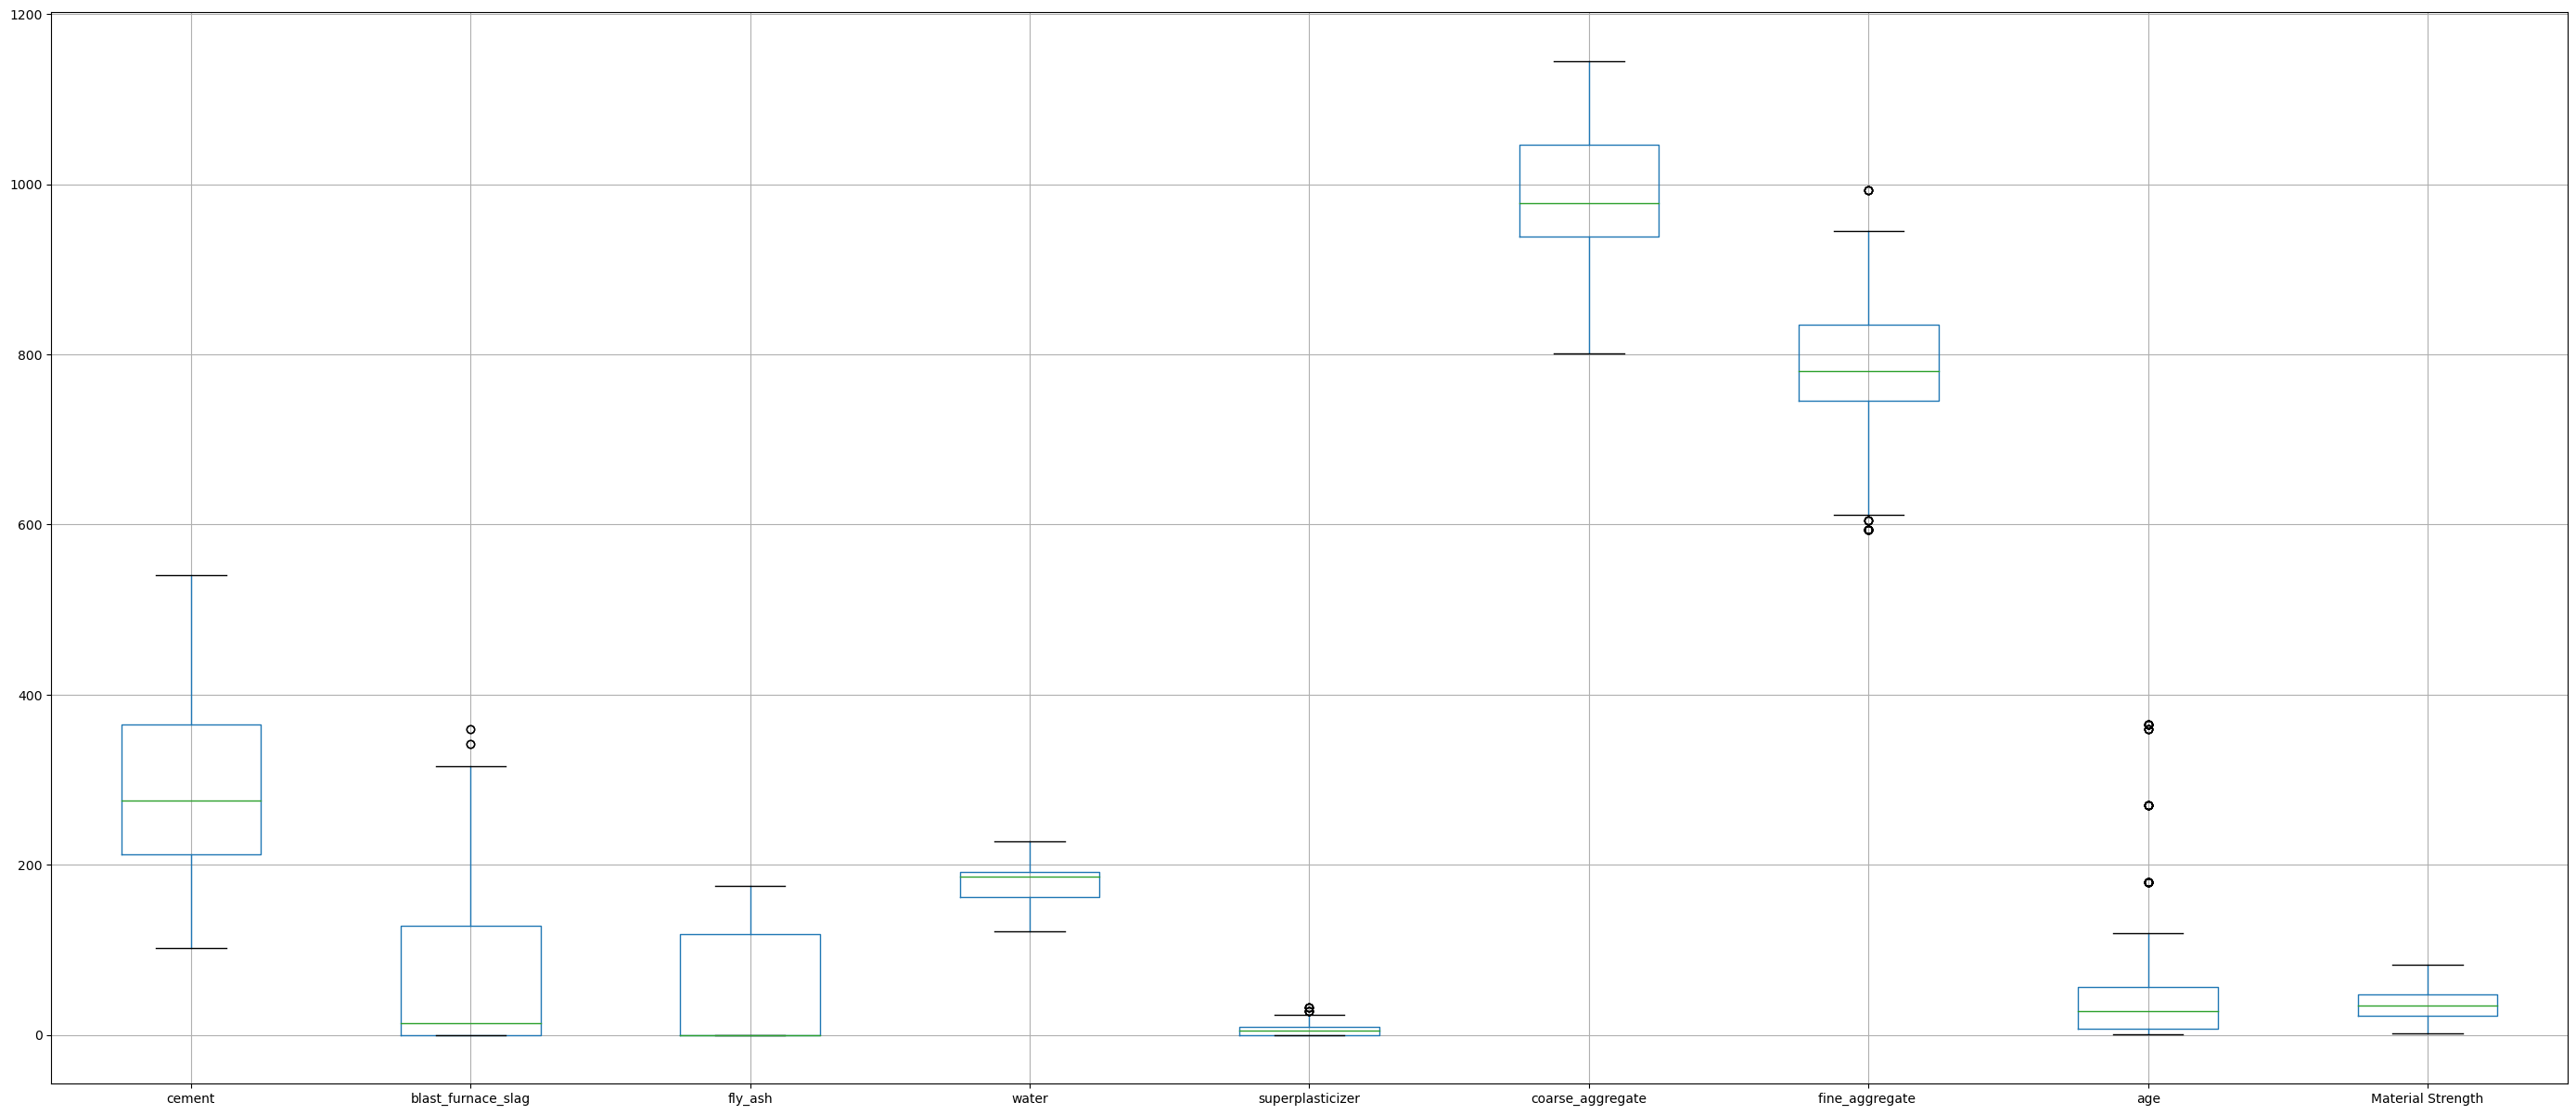

In [15]:
df=df_no_duplicates.copy()
df.boxplot(figsize=(35,15))

# # Inter Quartile Range(IQR) method to remove outliers

In [16]:
#remove ouliers
for col in df.columns[:-1]:
    quant1 = df[col].quantile(0.25)
    quant3 = df[col].quantile(0.75)
    iqr = quant3 - quant1

    low= quant1-1.5*iqr
    high = quant3+1.5*iqr
    df.loc[(df[col] < low) | (df[col] > high), col] = df[col].median()

<Axes: >

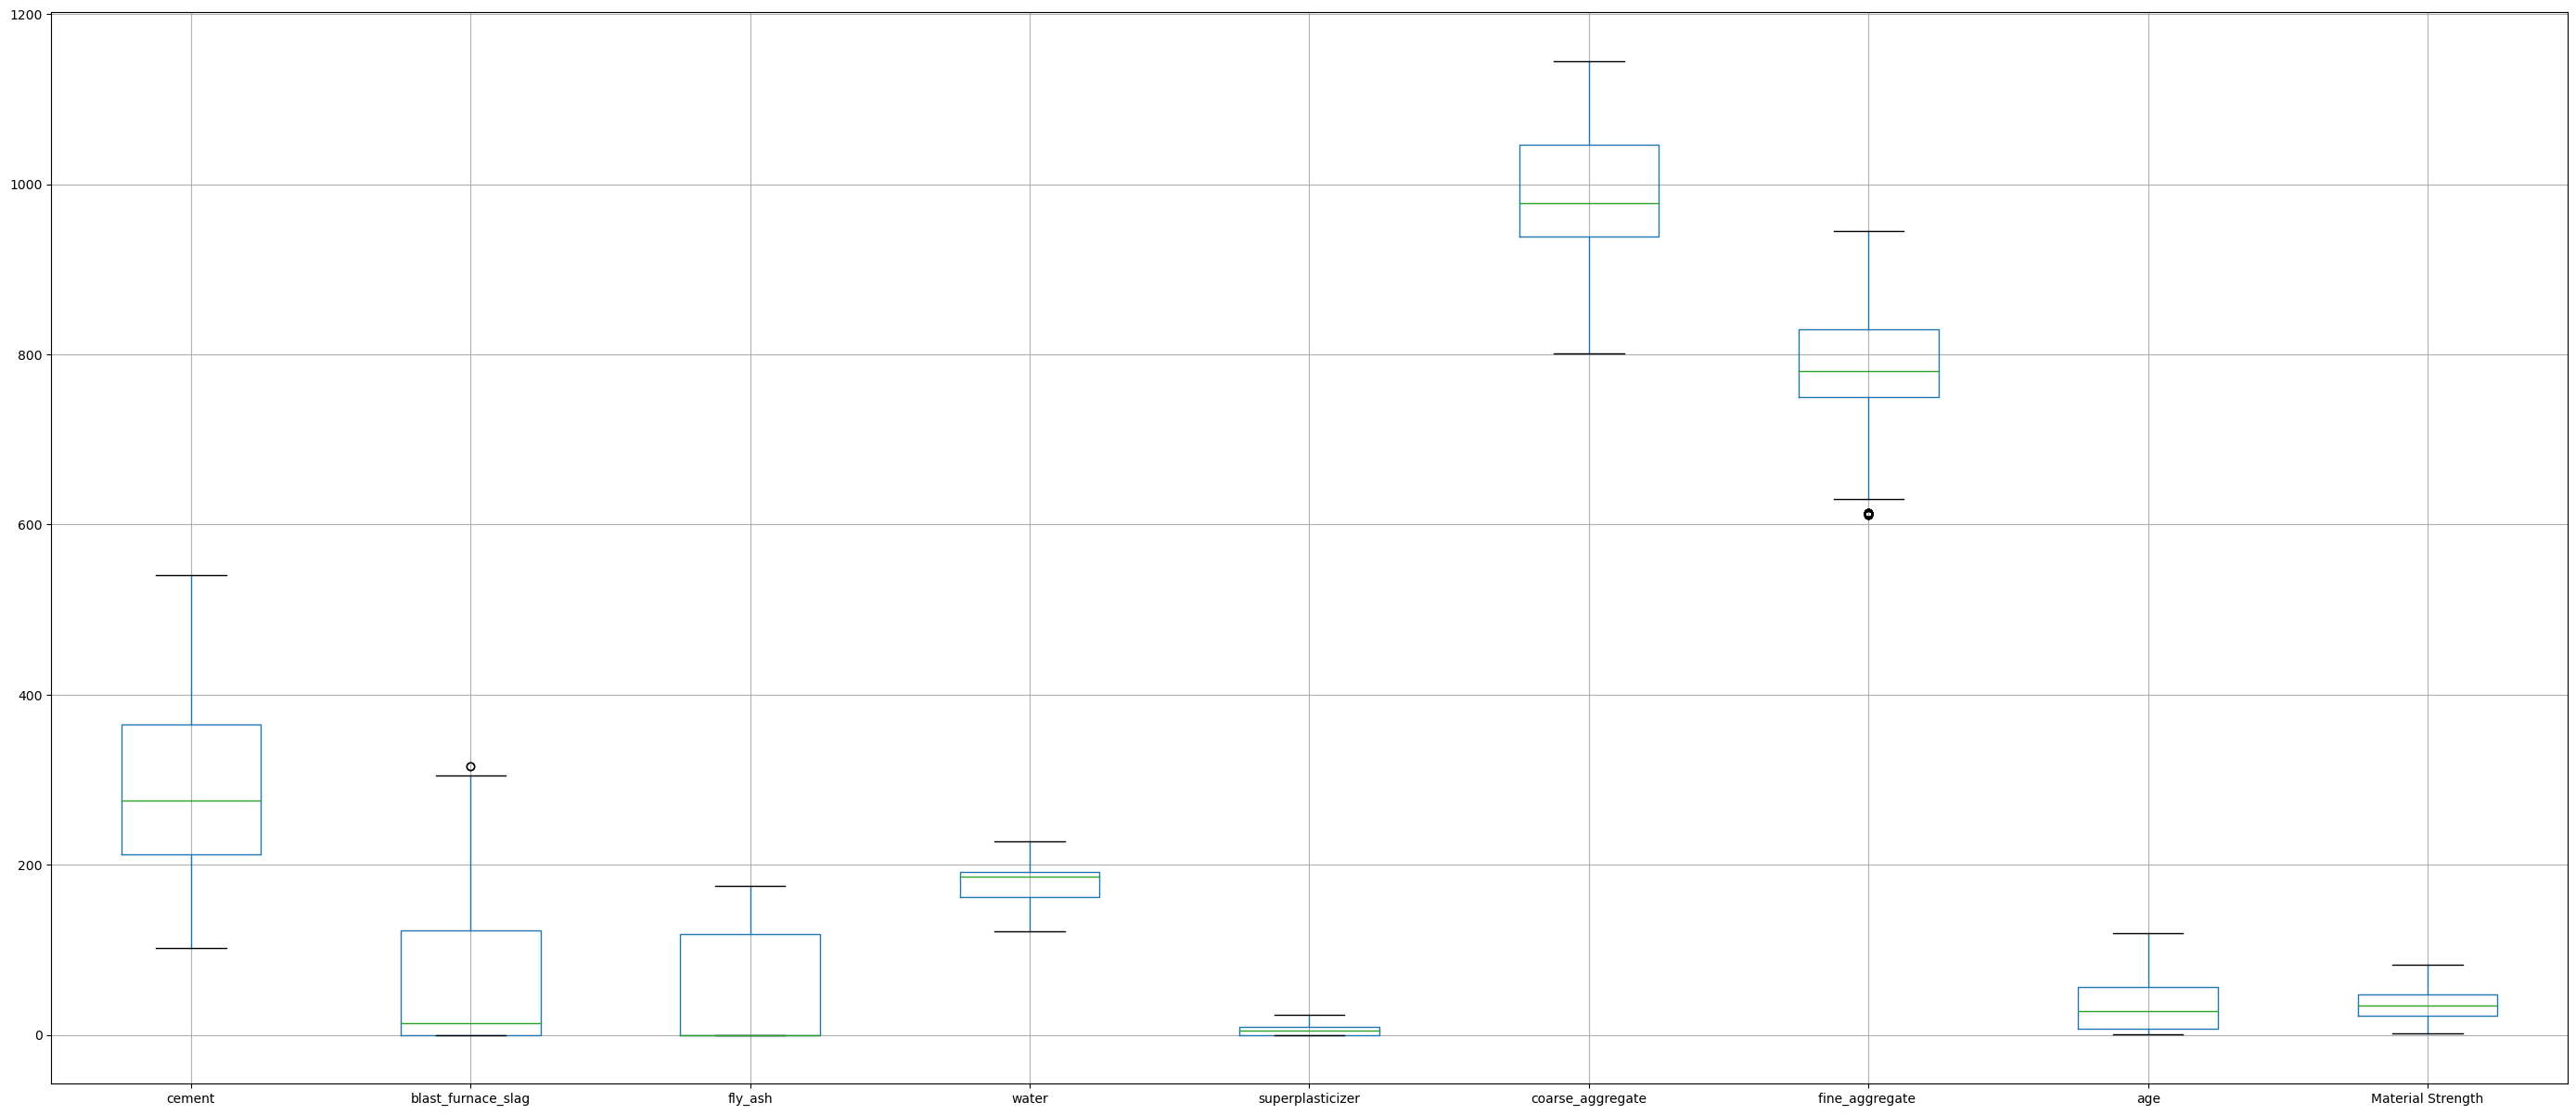

In [17]:
df.boxplot(figsize=(35,15))

In [18]:
df.shape

(776, 9)

## Feature Engineering

In [19]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler1.fit(df)

# transform train and test sets
df1 = scaler1.transform(df)


In [20]:
df1 = pd.DataFrame(df1, columns=df.columns)
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,2.415078,-0.762304,-0.796824,-0.827528,-0.476507,0.721771,-1.527838,-0.173714,2.568741
1,2.415078,-0.762304,-0.796824,-0.827528,-0.476507,0.930008,-1.527838,-0.173714,1.513633
2,0.414065,0.951100,-0.796824,2.142983,-0.931686,-0.777540,-0.052402,-0.173714,0.253332
3,0.414065,0.951100,-0.796824,2.142983,-0.931686,-0.777540,-0.052402,-0.173714,0.298800
4,-0.877191,0.829659,-0.796824,0.522705,-0.931686,-0.133392,0.578921,-0.173714,0.488254
...,...,...,...,...,...,...,...,...,...
771,2.270427,-0.762304,-0.796824,0.387681,-0.931686,1.901784,-2.415636,-0.173714,1.515381
772,2.029341,-0.762304,-0.796824,0.882767,-0.931686,1.901784,-2.415636,1.825265,0.658470
773,2.029341,-0.762304,-0.796824,0.882767,-0.931686,1.901784,-2.415636,-0.173714,0.881150
774,2.029341,-0.762304,-0.796824,0.882767,-0.931686,1.901784,-2.415636,-0.173714,1.121319


In [21]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler2.fit(df)

# transform train and test sets
df2 = scaler2.transform(df)



In [22]:
df2 = pd.DataFrame(df2, columns=df.columns)
df2.describe()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,0.428225,0.200567,0.282141,0.551660,0.218681,0.543630,0.518063,0.272167,0.418515
std,0.236905,0.263276,0.354310,0.209348,0.234867,0.209534,0.213109,0.260805,0.213849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251142,0.000000,0.000000,0.378531,0.000000,0.398837,0.414766,0.050420,0.255232
50%,0.394977,0.043024,0.000000,0.601695,0.193376,0.512500,0.506903,0.226891,0.404946
75%,0.601484,0.387852,0.676732,0.661017,0.410256,0.715116,0.654862,0.462185,0.565342
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Max-absolute
from sklearn.preprocessing import MaxAbsScaler
scaler3 = MaxAbsScaler()
# fit the scaler to the train set, it will learn the parameters
scaler3.fit(df)

# transform train and test sets
df3 = scaler3.transform(df)




In [24]:
df3 = pd.DataFrame(df3,columns=df.columns)
df3.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,0.536227,0.200567,0.282141,0.791168,0.218681,0.862890,0.830073,0.278232,0.434918
std,0.192156,0.263276,0.354310,0.097512,0.234867,0.062952,0.075141,0.258632,0.207817
min,0.188889,0.000000,0.000000,0.534211,0.000000,0.699563,0.647407,0.008333,0.028208
25%,0.392593,0.000000,0.000000,0.710526,0.000000,0.819389,0.793651,0.058333,0.276241
50%,0.509259,0.043024,0.000000,0.814474,0.193376,0.853537,0.826138,0.233333,0.421731
75%,0.676759,0.387852,0.676732,0.842105,0.410256,0.914410,0.878307,0.466667,0.577603
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Log Transformation

In [25]:
#Log-transform the data
import numpy as np
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
df4= trf.fit_transform(df)

df4


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,6.293419,0.000000,0.0,5.093750,1.252763,6.947937,6.517671,3.367296,4.394326
1,6.293419,0.000000,0.0,5.093750,1.252763,6.962243,6.517671,3.367296,4.141387
2,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.661471,3.367296,3.720136
3,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.661471,3.367296,3.738859
4,5.296315,4.893352,0.0,5.262690,0.000000,6.886940,6.717200,3.367296,3.813307
...,...,...,...,...,...,...,...,...,...
771,6.265301,0.000000,0.0,5.247024,0.000000,7.026427,6.419995,3.367296,4.141864
772,6.216606,0.000000,0.0,5.303305,0.000000,7.026427,6.419995,4.510860,3.875774
773,6.216606,0.000000,0.0,5.303305,0.000000,7.026427,6.419995,3.367296,3.952013
774,6.216606,0.000000,0.0,5.303305,0.000000,7.026427,6.419995,3.367296,4.028205


In [26]:
df4.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength'],
      dtype='object')

In [27]:

X = df.iloc[:,:-1]  # Training feature
Y= df.iloc[:,-1]
X_values=X.values
Y_values=Y.values

X.shape


(776, 8)

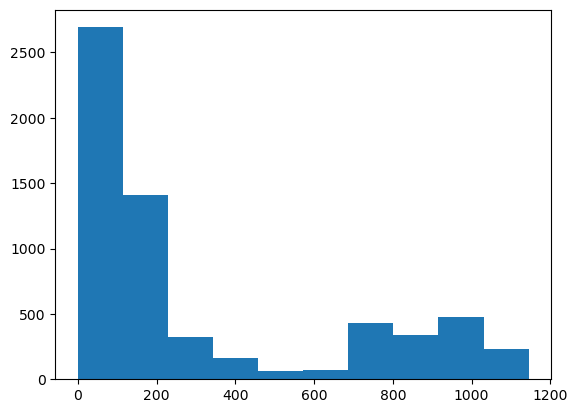

In [28]:

z = X_values.flatten()
plt.hist(z)
plt.show()

In [29]:
#Standardization
X1 = df1.iloc[:,:-1]  # Training feature
Y1= df1.iloc[:,-1]
X1_values=X1.values
Y1_values=Y1.values

X1.shape


(776, 8)

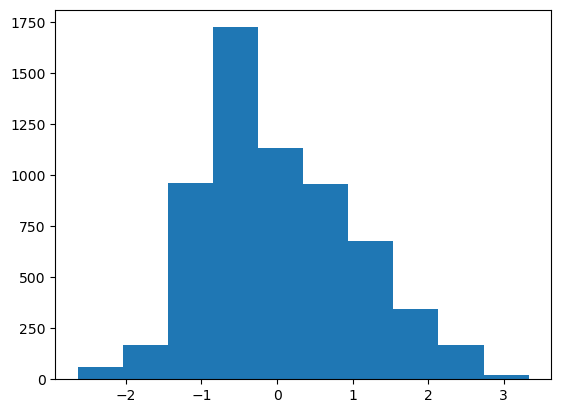

In [30]:

d = X1_values.flatten()
plt.hist(d)
plt.show()

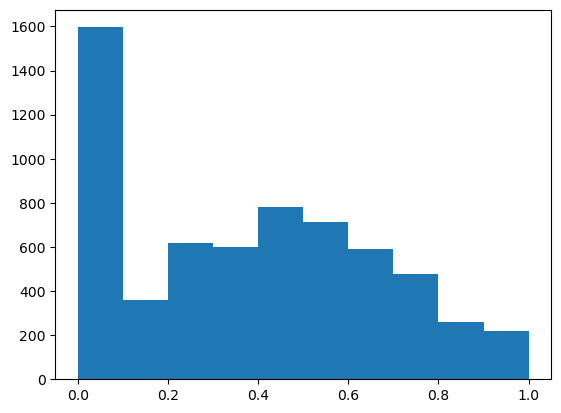

In [31]:
#Minmax scaling
X2 = df2.iloc[:,:-1]  # Training feature
Y2= df2.iloc[:,-1]
X2_values=X2.values
Y2_values=Y2.values
X2.shape
d2 = X2_values.flatten()
plt.hist(d2)
plt.show()

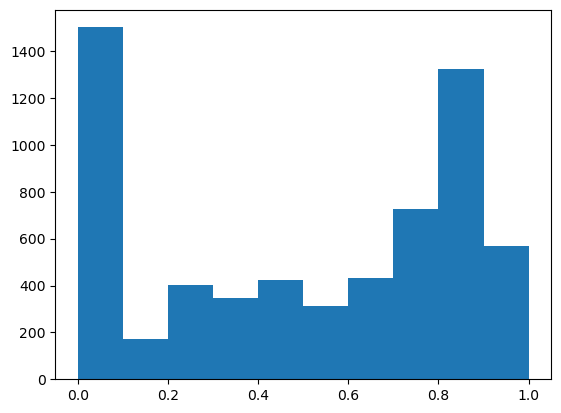

In [32]:
#max absolute scaling
X3 = df3.iloc[:,:-1]  # Training feature
Y3= df3.iloc[:,-1]
X3_values=X3.values
Y3_values=Y3.values

X3.shape
d3 = X3_values.flatten()
plt.hist(d3)
plt.show()


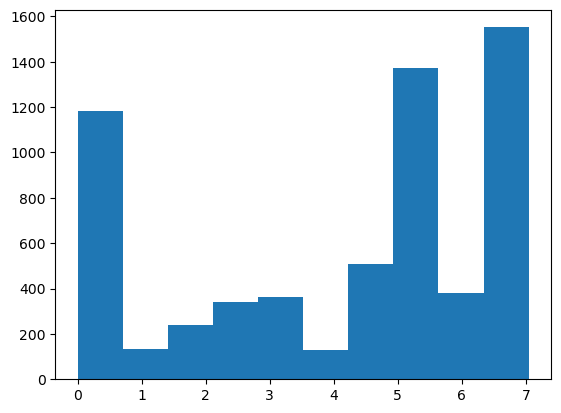

In [33]:
#log transformation
X4 = df4.iloc[:,:-1]  # Training feature
Y4= df4.iloc[:,-1]
X4_values=X4.values
Y4_values=Y4.values

X4.shape
d4 = X4_values.flatten()
plt.hist(d4)
plt.show()


In [34]:
#train test split
def train_test(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
    return X_train, X_test, Y_train, Y_test

In [35]:
#unscaled data
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.25, random_state = 0)
#Standardization
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1_values, Y1_values, test_size = 0.25, random_state = 0)
#min-max scaling
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2_values, Y2_values, test_size = 0.25, random_state = 0)
#max absolute scaling
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3_values, Y3_values, test_size = 0.25, random_state = 0)
#log-transform
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4_values, Y4_values, test_size = 0.25, random_state = 0)

print(X_train3.shape)
print(Y_train3.shape)

(582, 8)
(582,)


## K-Fold Approach

In [36]:
#unscaled Data
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=10,shuffle=True,random_state=1)
kf.get_n_splits(X)
mse=[]
mae=[]
r2=[]

for train_index, test_index in kf.split(X):
    X_train0, X_test0 = X.iloc[train_index], X.iloc[test_index]
    y_train0, y_test0 = Y.iloc[train_index], Y.iloc[test_index]
    model=LinearRegression()
    model.fit(X_train0,y_train0 )
    y_pred=model.predict(X_test0)
    mae0 = mean_absolute_error(y_test0, y_pred)
    mse0 = mean_squared_error(y_test0, y_pred)
    r20 = r2_score(y_test0, y_pred)
    mse.append(mse0)
    mae.append(mae0)
    r2.append(r20)

average_mse1=sum(mse)/len(mse)
print(average_mse1)
average_mae=sum(mae)/len(mae)
print(average_mae)

average_r2=sum(r2)/len(r2)
print(average_r2)

print(X_train3.shape)
print(Y_train3.shape)

86.54001151892246
7.227957123929069
0.7035462168062107
(582, 8)
(582,)


In [37]:
##Standardization
kf1 = KFold(n_splits=10,shuffle=True,random_state=1)
kf1.get_n_splits(X1)
mse1=[]
mae1=[]
r21=[]

for train_index, test_index in kf.split(X1):
    X_train11, X_test11 = X1.iloc[train_index], X1.iloc[test_index]
    y_train11, y_test11 = Y1.iloc[train_index], Y1.iloc[test_index]
    model1=LinearRegression()
    model1.fit(X_train11,y_train11 )
    y_pred1=model1.predict(X_test11)
    mae = mean_absolute_error(y_test11, y_pred1)
    mse = mean_squared_error(y_test11, y_pred1)
    r2 = r2_score(y_test11, y_pred1)
    mse1.append(mse)
    mae1.append(mae)
    r21.append(r2)

average_mse1=sum(mse1)/len(mse1)
print(average_mse1)
average_mae1=sum(mae1)/len(mae1)
print(average_mae1)

average_r21=sum(r21)/len(r21)
print(average_r21)

print(X_train3.shape)
print(Y_train3.shape)

0.2940723128954935
0.4213414271969649
0.7035462168062107
(582, 8)
(582,)


In [38]:
#min max scaling
kf2 = KFold(n_splits=10,shuffle=True,random_state=1)
kf2.get_n_splits(X2)
mse2=[]
mae2=[]
r22=[]

for train_index, test_index in kf.split(X2):
    X_train22, X_test22 = X2.iloc[train_index], X2.iloc[test_index]
    y_train22, y_test22 = Y2.iloc[train_index], Y2.iloc[test_index]
    model2=LinearRegression()
    model2.fit(X_train22,y_train22 )
    y_pred2=model2.predict(X_test22)
    mae = mean_absolute_error(y_test22, y_pred2)
    mse = mean_squared_error(y_test22, y_pred2)
    r2 = r2_score(y_test22, y_pred2)
    mse2.append(mse)
    mae2.append(mae)
    r22.append(r2)

average_mse2=sum(mse2)/len(mse2)
print(average_mse2)
average_mae2=sum(mae2)/len(mae2)
print(average_mae2)

average_r22=sum(r22)/len(r22)
print(average_r22)

print(X_train3.shape)
print(Y_train3.shape)

0.013431064128747752
0.09004556028315772
0.7035462168062108
(582, 8)
(582,)


In [39]:
3#max absolute
kf3 = KFold(n_splits=10,shuffle=True,random_state=1)
kf3.get_n_splits(X3)

mse3=[]
mae3=[]
r23=[]

for train_index, test_index in kf.split(X3):
    X_train33, X_test33 = X3.iloc[train_index], X3.iloc[test_index]
    y_train33, y_test33 = Y3.iloc[train_index], Y3.iloc[test_index]
    model3=LinearRegression()
    model3.fit(X_train33,y_train33 )
    y_pred3=model3.predict(X_test33)
    mae = mean_absolute_error(y_test33, y_pred3)
    mse = mean_squared_error(y_test33, y_pred3)
    r2 = r2_score(y_test33, y_pred3)
    mse3.append(mse)
    mae3.append(mae)
    r23.append(r2)

average_mse3=sum(mse3)/len(mse3)
print(average_mse3)
average_mae3=sum(mae3)/len(mae3)
print(average_mae3)

average_r23=sum(r23)/len(r23)
print(average_r23)

print(X_train3.shape)
print(Y_train3.shape)

0.012684018127403357
0.08750553418800326
0.7035462168062105
(582, 8)
(582,)


In [40]:
#log transformation
kf = KFold(n_splits=10,shuffle=True,random_state=1)
kf.get_n_splits(X4)

mse4=[]
mae4=[]
r24=[]

for train_index, test_index in kf.split(X4):
    X_train44, X_test44 = X4.iloc[train_index], X4.iloc[test_index]
    y_train44, y_test44 = Y4.iloc[train_index], Y4.iloc[test_index]

    model4=LinearRegression()
    model4.fit(X_train44,y_train44 )
    y_pred4=model4.predict(X_test44)
    mae = mean_absolute_error(y_test44, y_pred4)
    mse = mean_squared_error(y_test44, y_pred4)
    r2 = r2_score(y_test44, y_pred4)
    mse4.append(mse)
    mae4.append(mae)
    r24.append(r2)

average_mse4=sum(mse4)/len(mse4)
print(average_mse4)
average_mae4=sum(mae4)/len(mae4)
print(average_mae4)

average_r24=sum(r24)/len(r24)
print(average_r24)


0.05380617754085526
0.18040943111542782
0.8179951670909082


## Exact Solution
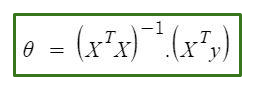

In [41]:
#exact solution
A= np.c_[np.ones(X_train3.shape[0]), X_train3]
theta_exact = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(Y_train3)
theta_exact


array([ 0.59296635,  0.5449215 ,  0.20828102,  0.06246576, -0.29513891,
        0.18531662, -0.14548891, -0.38067926,  0.44304779])

y = 0.59296635 * 1 + 0.5449215 * x1 + 0.20828102 * x2 + 0.06246576 * x3 - 0.29513891 * x4 + 0.18531662 * x5 - 0.14548891 * x6 - 0.38067926 * x7 + 0.44304779 * x8


####  solution

In [42]:
A_test= np.c_[np.ones(X_test3.shape[0]), X_test3]
A_T=np.transpose(A_test)
solution=np.dot(theta_exact,A_T)



####error

In [43]:
mae_exact = mean_absolute_error(Y_test3, solution)
mse_exact= mean_squared_error(Y_test3, solution)
r2_exact = r2_score(Y_test3,solution)
print(mae_exact)
print(mse_exact)
print(r2_exact)

0.08321042284051934
0.010929595750970035
0.7113130045231217


## Statistical Analysis

In [44]:
features_1 = df2[['cement',  'water','coarse_aggregate','fine_aggregate ' ]]
features_1= sm.add_constant(features_1)  # Add a constant (intercept) term
model1 = sm.OLS(df2['Material Strength'], features_1).fit()
print("Model 1 Summary:")
print(model1.summary())

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           2.77e-75
Time:                        17:55:35   Log-Likelihood:                 274.15
No. Observations:                 776   AIC:                            -538.3
Df Residuals:                     771   BIC:                            -515.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.

In [45]:
X_ols= sm.add_constant(X_train4)  # Add a constant term for the intercept
model_2 = sm.OLS(Y_train4, X_ols)  # OLS stands for Ordinary Least Squares (linear regression)
result_ols = model_2.fit()
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     330.6
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          4.36e-209
Time:                        17:55:35   Log-Likelihood:                 13.739
No. Observations:                 582   AIC:                            -9.478
Df Residuals:                     573   BIC:                             29.82
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3571      2.556      4.052      0.0

In [46]:
X_test_ols=sm.add_constant(X_test4)
y_pred_ols=result_ols.predict(X_test_ols)
r2_ols=r2_score(Y_test4, y_pred_ols)
print(r2_ols)

0.8394329858982575


<p><b>INTERPRETATION</b>
<ol>
    <li>How to decide whether the featur is significant or not: This can be decided by p-values. If the p-value is < 0.05 , then the feature is relatively significant, while the features having greater p-values are less significant in nature</li>
    <li>Confidence Intervals: A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times.</li>
</ol>
<b>MODEL-1</b>
<ul>
    <li>All the feature have p-value less than 0.05 ,hence all features are statistically significant.</li>
    <li>The confidence interval of the constant is relatively large which means that it does not weigh much will expecting precision from the model</li>
</ul>
<b>MODEL-2</b>
<ul>
    <li>the p-value of coarse aggregate is 0.052, which is somewhat less significant than others.</li>
    <li>The large coefficient vlaue of age/water indicates that y-value is heavily affected by that feature.</li>
    
</ul>
<b>COMPARISON</b>
<ol><li>The r-squared value for model-2 is 0.8394 and for model 1 is 0.36 . r-squared value more closer to one means that model is better trained. Hence, it is clear that model-2 is a better fit to the dataset than model-1. </li>

# Gradient Descent

In [47]:
#Gradient Descent Implementation
def gradient_descent(X,y,learning_rate,num_iterations):
    num_samples,num_attributes=X.shape

    # Let's initialise  parameter vector theta as 0
    theta=np.zeros(num_attributes)

    cost_list=[]
    a = []
    for i in range(num_iterations):
        #the prediction
        predicted_value=np.dot(X,theta)

        error=predicted_value-y

        gradient=np.dot(X.T,error)/num_samples

        theta=theta-learning_rate*gradient

        c = np.sum(error ** 2) / (2 * num_samples)
        cost_list.append(c)
        a.append(predicted_value)

    return theta, cost_list

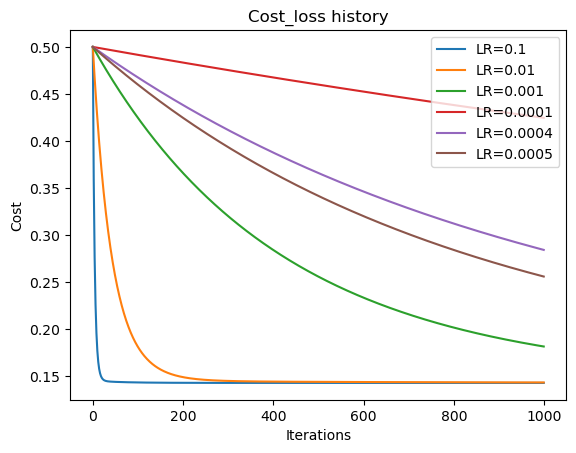

In [48]:
#standard scaling
one=np.ones((df.shape[0],1))
X1_ones=np.concatenate((one,X1),axis=1)
learning_rate=[0.1,0.01,0.001,0.0001,0.0004,0.0005]
theta_for_different_rates=[]
cost_list=[[]]
for i in range(len(learning_rate)):
    theta,c1=gradient_descent(X1_ones,Y1,learning_rate[i],1000)
    theta_for_different_rates.append(theta)
    cost_list.append(c1)


plt.plot(cost_list[1],label='LR=0.1')
plt.plot(cost_list[2],label='LR=0.01')
plt.plot(cost_list[3],label='LR=0.001')
plt.plot(cost_list[4],label='LR=0.0001')
plt.plot(cost_list[5],label='LR=0.0004')
plt.plot(cost_list[6],label='LR=0.0005')

plt.title('Cost_loss history')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.title('Cost_loss history')
plt.show()




In [49]:
#the best learning rate is 0.1 so we will calculate r2 score for this learning rate.
learning_rate=0.01
theta_out=theta_for_different_rates[1]
theta_out_final=theta_out[:]
y_pred_gradient=np.dot(X1_ones,theta_out)
mse_gradient = mean_squared_error(Y1, y_pred_gradient)
r2_gradient=r2_score(Y1, y_pred_gradient)
print(mse_gradient)
print(r2_gradient)

0.2866553871329367
0.7133446128670633


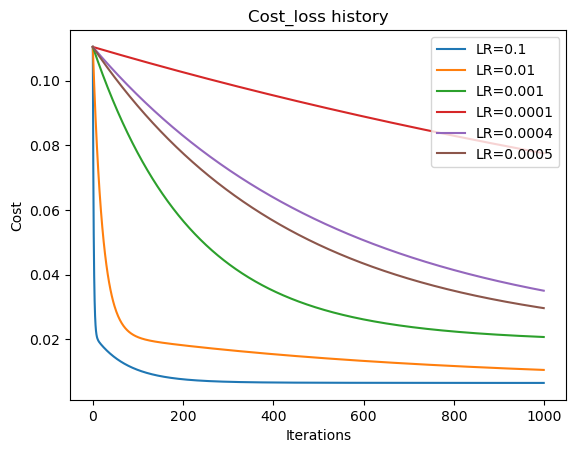

In [50]:
#min-max scaling
one=np.ones((df.shape[0],1))
X2_ones=np.concatenate((one,X2),axis=1)
learning_rate=[0.1,0.01,0.001,0.0001,0.0004,0.0005]
theta_for_different_rates=[]
cost_list=[[]]
for i in range(len(learning_rate)):
    theta,c1=gradient_descent(X2_ones,Y2,learning_rate[i],1000)
    theta_for_different_rates.append(theta)
    cost_list.append(c1)


plt.plot(cost_list[1],label='LR=0.1')
plt.plot(cost_list[2],label='LR=0.01')
plt.plot(cost_list[3],label='LR=0.001')
plt.plot(cost_list[4],label='LR=0.0001')
plt.plot(cost_list[5],label='LR=0.0004')
plt.plot(cost_list[6],label='LR=0.0005')

plt.title('Cost_loss history')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.title('Cost_loss history')
plt.show()

In [51]:

learning_rate=0.1
theta_out=theta_for_different_rates[0]
theta_out_final=theta_out[:]
y_pred_gradient=np.dot(X2_ones,theta_out)
mse_gradient = mean_squared_error(Y2, y_pred_gradient)
r2_gradient=r2_score(Y2, y_pred_gradient)

print(mse_gradient)
print(r2_gradient)


0.013098359860905547
0.713212226335106


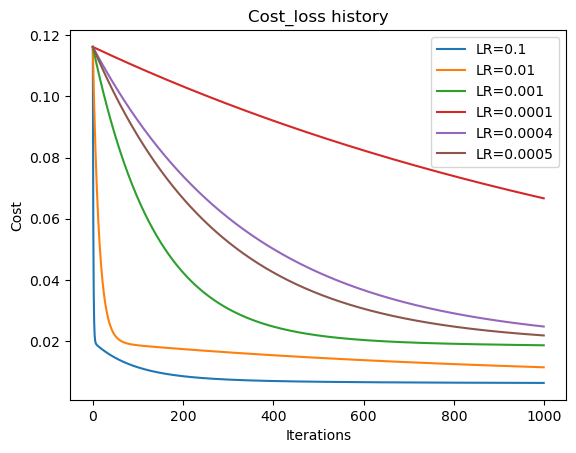

In [52]:
#max absolute scaling
one=np.ones((df.shape[0],1))
X3_ones=np.concatenate((one,X3),axis=1)
learning_rate=[0.1,0.01,0.001,0.0001,0.0004,0.0005]
theta_for_different_rates=[]
cost_list=[[]]
for i in range(len(learning_rate)):
    theta,c1=gradient_descent(X3_ones,Y3,learning_rate[i],1000)
    theta_for_different_rates.append(theta)
    cost_list.append(c1)


plt.plot(cost_list[1],label='LR=0.1')
plt.plot(cost_list[2],label='LR=0.01')
plt.plot(cost_list[3],label='LR=0.001')
plt.plot(cost_list[4],label='LR=0.0001')
plt.plot(cost_list[5],label='LR=0.0004')
plt.plot(cost_list[6],label='LR=0.0005')

plt.title('Cost_loss history')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.title('Cost_loss history')
plt.show()

In [53]:
learning_rate=0.1
theta_out=theta_for_different_rates[0]
theta_out_final=theta_out[:]
y_pred_gradient=np.dot(X3_ones,theta_out)
mse_gradient = mean_squared_error(Y3, y_pred_gradient)
r2_gradient=r2_score(Y3, y_pred_gradient)

print(mse_gradient)
print(r2_gradient)

0.01275445226568081
0.7042947085213789


### Observations in Gradient descent

<ul>
    <li>After changing lots of parameters and analysing on all the models, we can safely say that the best among all the 3 dataframes ,max-absolute scaling  is best suited for this dataset.As mentions earlier model is said to better if the r2 score for it is closer to 1 and mse closer to 0.</li>

# K-Nearest-Neighbours

[0.285355644822062, 0.2171213878707319, 0.24259117446959766, 0.23620878963942443, 0.2271526765508181, 0.23354885805713904, 0.22965115047977125, 0.22905006314134302]
[0.6749034907765683, 0.7526405853350603, 0.7236236765610278, 0.7308949223431245, 0.7412122607440326, 0.7339252968524963, 0.7383658297466891, 0.7390506292206342]


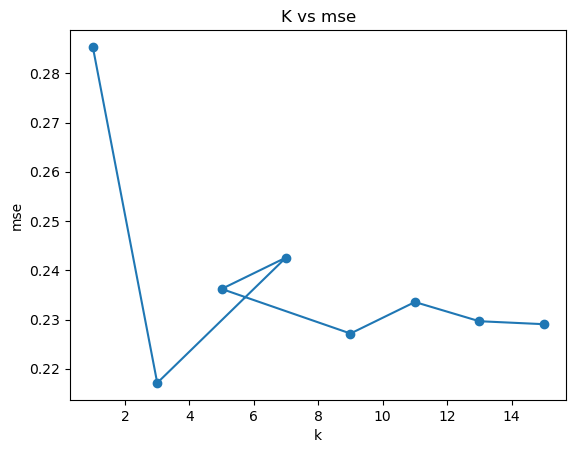

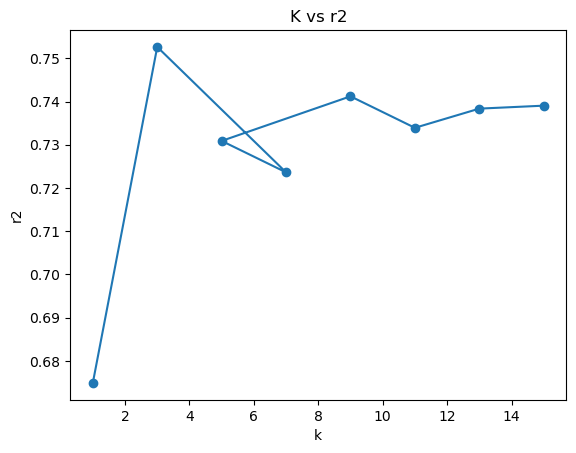

In [54]:
#We will try knn for different no. of nearest neighbours
k=[1,3,7,5,9,11,13,15]
mse_knn=[]
r2_knn=[]
for i in range(len(k)):
    knn = KNeighborsRegressor(n_neighbors=k[i])        # Create KNN model
    knn.fit(X_train1, Y_train1)                       # Train the model
    y_pred_knn = knn.predict(X_test1)                     # Make predictions
    mse_k = mean_squared_error(Y_test1, y_pred_knn)
    r2_k = r2_score(Y_test1, y_pred_knn)
    mse_knn.append(mse_k)
    r2_knn.append(r2_k)
print(mse_knn)
print(r2_knn)

# Create a scatter plot
plt.scatter(k, mse_knn)

# Add a line to the scatter plot
plt.plot(k, mse_knn)

plt.xlabel("k")
plt.ylabel("mse")
plt.title("K vs mse")
# Show the plot
plt.show()

# Create a scatter plot
plt.scatter(k, r2_knn)

# Add a line to the scatter plot
plt.plot(k, r2_knn)

plt.xlabel("k")
plt.ylabel("r2")
plt.title("K vs r2")
# Show the plot
plt.show()

# Comparison with parametric approaches
### Observations
<ul><li>smaller values of "k" (e.g. 3 or 4)  can fit the training data very closely, potentially resulting in overfitting. This means the model may not generalize well to unseen data.
Larger values of "k" (e.g., 11) result in a smoother decision boundary, which can lead to underfitting if the dataset is complex. The model may not capture local patterns effectively.</li><ul>
<ul><li>KNN performs better when the decision boundaries are not defined and the complex patterns can be represented a simpler linear models.</li>
    <li>KNN can perform better for smaller datasets as it use data points to calculate the distances whereas in linear models when the dataset is small it leads to overfitting.</li>
    <li>KNN is less effective for datasets with more number of attributes or features.</li>
    <li>The choice of hyperparameters in KNN,such as no.of neighbours(k) can affect the accuracy of the model. Hence tuning these hyperparameters is very crucial. </li>
    <li>As KNN uses distance from its neighbours the noise or outliers can have great impact on our predictions. .</li></ul>
    
### PROS:
 
<ul><li> It is useful when we don't know the distribution of data as we directly make use of the data points.</li>
    <li>It can fit to various types of data including non-linear data.</li>
    <li>It is an easy approach and easy to understand.</li>
    <li>KNN can be used for anomaly detection by identifying data points that are far from their nearest neighbors.</li>
    
</ul>

#### CONS:

<ul><li>KNN is sensitive to the scale of features as the their distances can dominate the features with low scale.So featur scaling becomes extremely important.</li>
    <li></li>
    <li>KNN becomes less significant with the increase of dimension or features. It is also known as <b>curse of dimensionality</b></li>
    <li>KNN stares the distances for all points with requires a lot of memory for large datasets.</li>
    <li>KNN can be slow a slow approach if the number of neighbours is more or dataser is large.</li>
</ul>



# Generalized Linear Models

In [55]:

X_gauss= sm.add_constant(X_train1) # Add a constant term for the intercept
model_gauss = sm.GLM(Y_train1,X_gauss, family=sm.families.Gaussian(link=sm.families.links.Identity()))
result = model_gauss.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  582
Model:                            GLM   Df Residuals:                      573
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                         0.30240
Method:                          IRLS   Log-Likelihood:                -473.25
Date:                Tue, 05 Sep 2023   Deviance:                       173.28
Time:                        17:55:41   Pearson chi2:                     173.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9132
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.023     -0.336      0.7

In [56]:
X_test_gauss=sm.add_constant(X_test1)

y_pred_gauss=result.predict(X_test_gauss)
mse_gauss=mean_squared_error(Y_test1, y_pred_gauss)
r2_gauss=r2_score(Y_test1, y_pred_gauss)

print(mse_gauss)
print(r2_gauss)


0.25339694954839337
0.7113130045231202


In [57]:
mse_gauss=mean_squared_error(Y_test1, y_pred_gauss)
print(mse_gauss)

0.25339694954839337


### Why Gaussion Distribution
<ul>
    <li>Using a Gaussian distribution with an identity link function in a Generalized Linear Model (GLM) is appropriate when you are dealing with continuous response variables.</li>
    
    <li>The distribution of our original data after standardization wasfound out to be Gaussian Distribution Therefore,I chose the Gaussian Distribution for this glm.</li>
</ul>

In [58]:

X_poisson= sm.add_constant(X_train) # Add a constant term for the intercept
model_poisson = sm.GLM(Y_train,X_poisson, family=sm.families.Poisson(link=sm.families.links.log()))
result = model_poisson.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  582
Model:                            GLM   Df Residuals:                      573
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2425.1
Date:                Tue, 05 Sep 2023   Deviance:                       1767.7
Time:                        17:55:41   Pearson chi2:                 1.76e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9968
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4186      0.332     10.289      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [59]:
Y_test.shape

(194,)

In [60]:
X_test_poisson=sm.add_constant(X_test)

y_pred_poisson=result.predict(X_test_poisson)

mse_poisson=mean_squared_error(Y_test, y_pred_poisson)
r2_poisson=r2_score(Y_test, y_pred_poisson) 
print(mse_poisson)
print(r2_poisson)

88.43176755721991
0.6576492114746444


### Why Poisson Distribution
<ul><li>The distribution of our original data after removing the outliers was found out to be Poisson Distribution Therefore,I chose the Poisson Distribution for this glm.</li></ul>

## for all the model the best model was found out to be of OLS with r2 value=0.8394

# Fitting the best modet on Test Set

In [61]:
test_data_read=pd.read_csv("MaterialStrength_test.csv")
test_data=test_data_read.iloc[:,:-1].values
#convert the test data to log
from sklearn.preprocessing import FunctionTransformer
trf_test = FunctionTransformer(func=np.log1p)
test_final=trf_test.fit_transform(test_data)

In [62]:
#apply the best model for your test data(gaussian distribution with identity link)
test_data=sm.add_constant(test_final)
y_pred_final_test=result_ols.predict(test_data)
y_pred_final_test

#inverse transform
def func(y):
  return np.exp(y)

y_predictions=func(y_pred_final_test)


In [63]:
#Create a new dataframe for the output without header
Prediction_final=pd.DataFrame({'Predictedvalues':y_predictions})
Prediction_final.describe()

,Predictedvalues
count,230.000000
mean,37.952451
std,11.486599
min,16.009282
25%,29.324400
50%,37.048123
75%,44.296931
max,111.332253


In [64]:
Prediction_final.to_csv('./12140640_Esha_Asg1.csv',header=False,index=False)

## References

<ul>
    <li>Hands on ML book: Code references for EDA and feature engineering and exact solutin from chapter-2 and chapter-4 of the book</li>
    <li>Sklearn Documentation<ul>
        <li>For various errors and measurement techniques like mse, r2, mae</li>
         <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNN</a></li>
        </ul>
    <li>Matplotlib documentation for various plots</li>
    <li><a href="https://towardsdatascience.com/scikit-learns-generalized-linear-models-4899695445fa">Towards Data science </a> for Generalised Linear Models</li>
    <li>Statmodels API documentation for statistical analysis using OLS and Generalized Linear Models <a href="https://www.statsmodels.org/stable/api.html">Link</a></li>
    <li>This GFG article for Gradient Descent <a href="https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/">Gradient descent implementation from scratch</a></li>
    <li>For Feature Engineering<a href="https://serokell.io/blog/feature-engineering-for-machine-learning">link</a></li>
   
    
</ul>

In [72]:
test_actual = pd.read_csv("concrete_data_Solution.csv", header=None)
test_actual.shape

(230, 1)

In [73]:
mse_actual=mean_squared_error(test_actual, Prediction_final)

In [74]:
mse_actual

103.11586364571859

In [75]:
mae_actual=mean_absolute_error(test_actual, Prediction_final)

In [76]:
mae_actual

8.114689262023255

In [79]:
 from sklearn.metrics import mean_absolute_percentage_error


In [80]:
mape_actual=mean_absolute_percentage_error(test_actual, Prediction_final)

In [81]:
mape_actual

0.3243520804023118